In [102]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style("white")
%matplotlib inline

In [92]:
data = pd.read_csv("../../data/feature_engineered_data.csv")#[['ahi', 'bmi', 'zscore', 'age', 'Female']]

In [131]:
data

,ahi,bmi,zscore,age,term,Female,Asian,Black,Hispanic,allergies,...,age_black,age_asthma,age_gerd,age_female,age_term,bmi_black,bmi_asthma,bmi_gerd,bmi_female,bmi_term
0,2.1,25.929191,4.920000,3.093771,0.0,0,0,0,0,0,...,0.000000,0.000000,3.093771,0.000000,0.000000,0.000000,0.000000,25.929191,0.000000,0.000000
1,15.8,31.462240,4.927145,4.550308,0.0,0,0,0,1,1,...,0.000000,4.550308,4.550308,0.000000,0.000000,0.000000,31.462240,31.462240,0.000000,0.000000
2,28.6,36.104691,4.990000,4.678987,0.0,0,0,0,1,0,...,0.000000,0.000000,4.678987,0.000000,0.000000,0.000000,0.000000,36.104691,0.000000,0.000000
3,118.0,69.219425,3.460000,16.953425,0.0,0,0,1,0,1,...,16.953425,16.953425,16.953425,0.000000,0.000000,69.219425,69.219425,69.219425,0.000000,0.000000
4,60.5,50.974365,3.160000,17.120548,0.0,0,0,1,0,1,...,17.120548,17.120548,17.120548,0.000000,0.000000,50.974365,50.974365,50.974365,0.000000,0.000000
5,44.3,43.411468,2.880000,16.473973,0.0,0,0,0,1,0,...,0.000000,16.473973,16.473973,0.000000,0.000000,0.000000,43.411468,43.411468,0.000000,0.000000
6,64.4,38.312284,2.630000,16.473973,0.0,0,1,0,0,1,...,0.000000,16.473973,16.473973,0.000000,0.000000,0.000000,38.312284,38.312284,0.000000,0.000000
7,0.3,40.888776,2.730000,15.005479,0.0,0,0,0,1,1,...,0.000000,15.005479,15.005479,0.000000,0.000000,0.000000,40.888776,40.888776,0.000000,0.000000
8,143.2,67.279297,2.850000,16.813699,0.0,1,0,0,1,1,...,0.000000,16.813699,16.813699,16.813699,0.000000,0.000000,67.279297,67.279297,67.279297,0.000000
9,26.5,29.225246,1.700000,17.808219,0.0,0,0,1,0,1,...,17.808219,17.808219,17.808219,0.000000,0.000000,29.225246,29.225246,29.225246,0.000000,0.000000


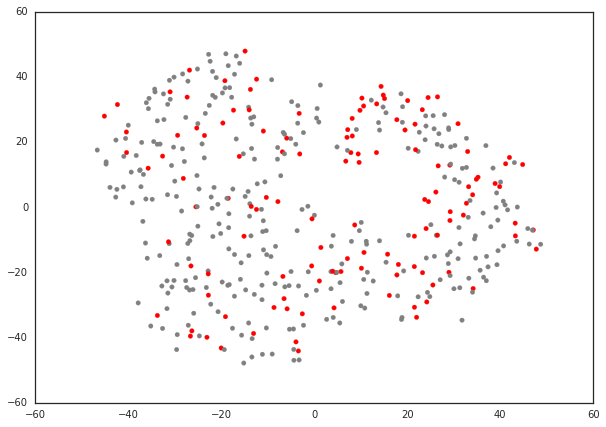

In [130]:
def plotTSNE(data, ahi_cutoff=5, perform_PCA=False):
    y, X = data['ahi'], data.drop('ahi', axis=1)
    colours = (y > ahi_cutoff).replace({True: "red", False: "grey"})
    colours = np.array(colours)[:,np.newaxis]
    # perform PCA
    if perform_PCA:
        pca_model = PCA(n_components=5)
        X = pca_model.fit_transform(X)
    # perform TSNE
    m = TSNE(perplexity=15.0)
    points = m.fit_transform(X)
    df = pd.DataFrame(np.hstack((points, colours)), columns=['X Value', 'Y Value', 'Apnea'])
    sns.plt.figure(figsize = (10,7))
    sns.plt.scatter(df['X Value'], df['Y Value'], color = df['Apnea'])
    
plotTSNE(data, 5, True)